In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load data
data = pd.read_csv('all_data.csv')


In [3]:
data.head()


,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [98]:
print(data.dtypes)

Year                                  int64
Life expectancy at birth (years)    float64
GDP                                 float64
dtype: object


In [6]:
data.Year = data.Year.astype("float64")

In [7]:
print(data.dtypes)

Country                              object
Year                                float64
Life expectancy at birth (years)    float64
GDP                                 float64
dtype: object


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     float64
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(3), object(1)
memory usage: 3.1+ KB


In [5]:
data.describe()

,Year,Life expectancy at birth (years),GDP
count,96.000000,96.000000,9.600000e+01
mean,2007.500000,72.789583,3.880499e+12
std,4.633971,10.672882,5.197561e+12
min,2000.000000,44.300000,4.415703e+09
25%,2003.750000,74.475000,1.733018e+11
50%,2007.500000,76.750000,1.280220e+12
75%,2011.250000,78.900000,4.067510e+12
max,2015.000000,81.000000,1.810000e+13


In [11]:
data.GDP.std()

5197561310975.917

In [19]:
# more information
# unique countries
print('There are ' + str(data.Country.nunique()) + ' unique countries')
print('There are ' + str(data.Year.nunique()) + ' unique years')


There are 6 unique countries
There are 16 unique years


In [15]:
print(data.Country.unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


In [16]:
# rename life expectancy
data.rename(columns = {'Life expectancy at birth (years)': 'life_expectancy'}, inplace = True)

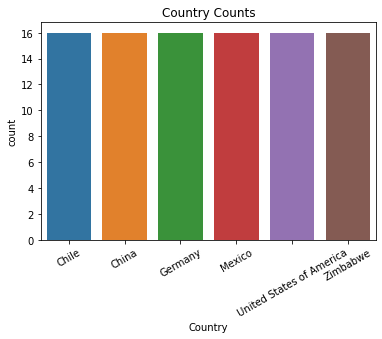

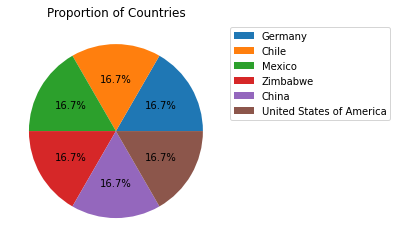

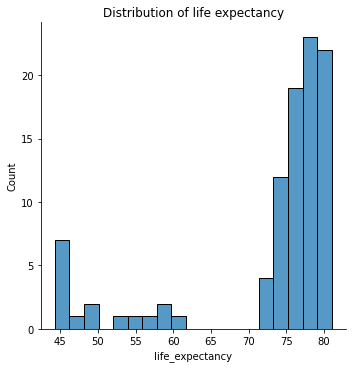

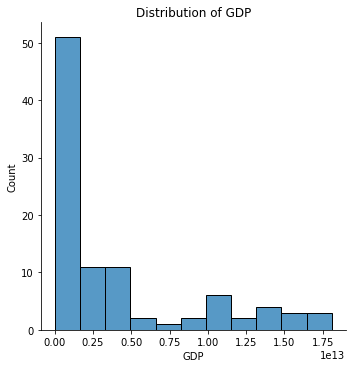

In [40]:
# visulization: single variable
# bar graph for country
sns.countplot(data = data, x = 'Country')
plt.title('Country Counts')
plt.xticks(rotation = 30)
plt.show()
# pie plot for country
plt.pie(data.Country.value_counts(), autopct = '%0.1f%%')
plt.title('Proportion of Countries')
plt.legend(data.Country.value_counts().index,  bbox_to_anchor=(1, 1), loc="upper left")
plt.show()
# histogram for life expectancy
sns.displot(data.life_expectancy)
plt.title('Distribution of life expectancy')
plt.show()
# hist for gdp
sns.displot(data.GDP)
plt.title('Distribution of GDP')
plt.show()

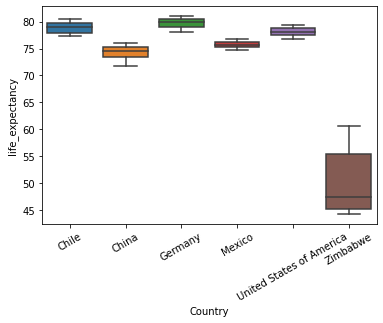

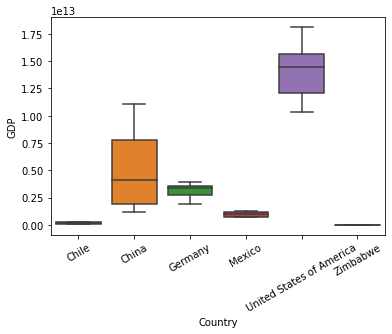

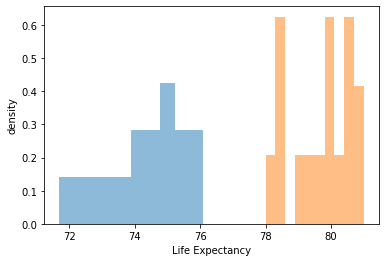

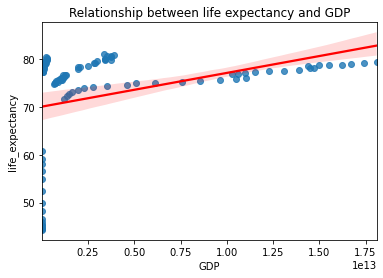

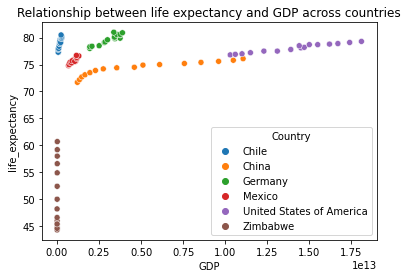

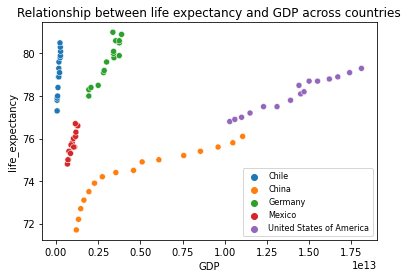

In [65]:
# visualization for 2 vars
# how does life expectancy and gdp differ acorss countries
sns.boxplot(data = data, x = 'Country', y = 'life_expectancy')
plt.xticks(rotation = 30)
plt.show()

# for gdp
sns.boxplot(data = data, x = 'Country', y = 'GDP')
plt.xticks(rotation = 30)
plt.show()

# hist for life expectancy for china and germany
plt.hist(data.life_expectancy[data.Country == 'China'], label = 'China', density = True, alpha = 0.5)
plt.hist(data.life_expectancy[data.Country == 'Germany'], label = 'Germany', density = True, alpha = 0.5)
plt.xlabel('Life Expectancy')
plt.ylabel('density')
plt.show()

# scatter plot for life expectancy and gdp
sns.regplot(data=data, x='GDP', y='life_expectancy', scatter=True, line_kws={"color": "red"})
plt.title('Relationship between life expectancy and GDP')
plt.show()

# for different countries
sns.scatterplot(data=data, x='GDP', y='life_expectancy', hue = 'Country')
plt.title('Relationship between life expectancy and GDP across countries')
plt.show()

# exclude zimbabwe
sns.scatterplot(data=data[data.Country != 'Zimbabwe'], x='GDP', y='life_expectancy', hue = 'Country')
plt.title('Relationship between life expectancy and GDP across countries')
plt.legend(fontsize = 8)
plt.show()

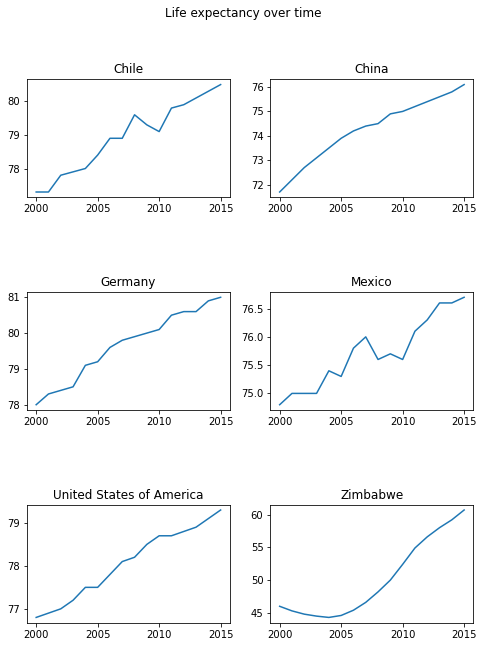

In [63]:
# time trend life expectancy
plt.figure(figsize = (8, 10))
plt.subplot(3,2,1)
plt.plot(data[data.Country == 'Chile'].Year, data[data.Country == 'Chile'].life_expectancy)
plt.suptitle('Life expectancy over time')
plt.title('Chile')
plt.subplot(3,2,2)
plt.plot(data[data.Country == 'China'].Year, data[data.Country == 'China'].life_expectancy)
plt.title('China')
plt.subplot(3,2,3)
plt.plot(data[data.Country == 'Germany'].Year, data[data.Country == 'Germany'].life_expectancy)
plt.title('Germany')
plt.subplot(3,2,4)
plt.plot(data[data.Country == 'Mexico'].Year, data[data.Country == 'Mexico'].life_expectancy)
plt.title('Mexico')
plt.subplot(3,2,5)
plt.plot(data[data.Country == 'United States of America'].Year, data[data.Country == 'United States of America'].life_expectancy)
plt.title('United States of America')
plt.subplot(3,2,6)
plt.plot(data[data.Country == 'Zimbabwe'].Year, data[data.Country == 'Zimbabwe'].life_expectancy)
plt.title('Zimbabwe')
plt.subplots_adjust(hspace = 0.8)
plt.show()

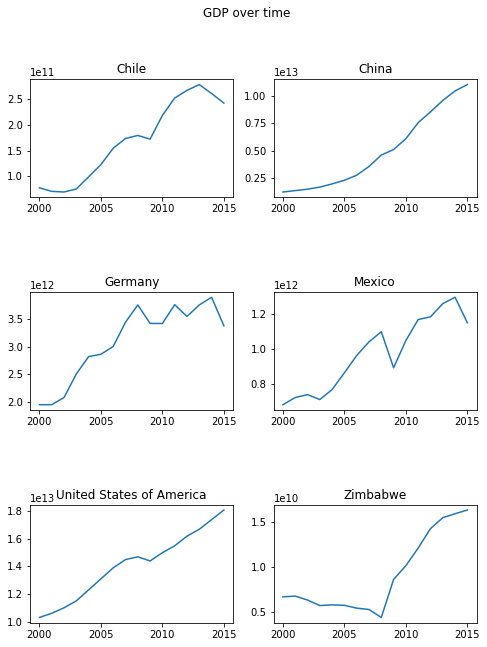

In [64]:
# time trend GDP
plt.figure(figsize = (8, 10))
plt.subplot(3,2,1)
plt.plot(data[data.Country == 'Chile'].Year, data[data.Country == 'Chile'].GDP)
plt.suptitle('GDP over time')
plt.title('Chile')
plt.subplot(3,2,2)
plt.plot(data[data.Country == 'China'].Year, data[data.Country == 'China'].GDP)
plt.title('China')
plt.subplot(3,2,3)
plt.plot(data[data.Country == 'Germany'].Year, data[data.Country == 'Germany'].GDP)
plt.title('Germany')
plt.subplot(3,2,4)
plt.plot(data[data.Country == 'Mexico'].Year, data[data.Country == 'Mexico'].GDP)
plt.title('Mexico')
plt.subplot(3,2,5)
plt.plot(data[data.Country == 'United States of America'].Year, data[data.Country == 'United States of America'].GDP)
plt.title('United States of America')
plt.subplot(3,2,6)
plt.plot(data[data.Country == 'Zimbabwe'].Year, data[data.Country == 'Zimbabwe'].GDP)
plt.title('Zimbabwe')
plt.subplots_adjust(hspace = 0.8)
plt.show()

In [72]:
# regressions: what's the relationship between life expectancy and gdp
# OLS
import statsmodels.api as sm
model1 = sm.OLS.from_formula('life_expectancy~GDP', data = data)
results1 = model1.fit()
print(results1.params)
print(results1.summary())


Intercept    7.005478e+01
GDP          7.047546e-13
dtype: float64
                            OLS Regression Results                            
Dep. Variable:        life_expectancy   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     12.55
Date:                Fri, 28 Feb 2025   Prob (F-statistic):           0.000619
Time:                        15:44:22   Log-Likelihood:                -357.00
No. Observations:                  96   AIC:                             718.0
Df Residuals:                      94   BIC:                             723.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

In [108]:
# with country fixed effects
from linearmodels.panel import PanelOLS

# Set multi-index for panel data
data = data.set_index(['Country', 'Year'])



KeyError: "None of ['Country', 'Year'] are in the columns"

In [111]:
print(data.index.names)  # Shows current index names
print(data.columns)  # Shows column names


['Country', 'Year']
Index(['Life expectancy at birth (years)', 'GDP'], dtype='object')


In [117]:
# Run Fixed Effects Model

model2 = PanelOLS.from_formula("life_expectancy ~ GDP + EntityEffects", data = data).fit()
print(model2)


                          PanelOLS Estimation Summary                           
Dep. Variable:        life_expectancy   R-squared:                        0.0655
Estimator:                   PanelOLS   R-squared (Between):              0.0407
No. Observations:                  96   R-squared (Within):               0.0655
Date:                Fri, Feb 28 2025   R-squared (Overall):              0.0407
Time:                        16:14:15   Log-likelihood                   -221.14
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      6.2411
Entities:                           6   P-value                           0.0143
Avg Obs:                       16.000   Distribution:                    F(1,89)
Min Obs:                       16.000                                           
Max Obs:                       16.000   F-statistic (robust):             6.2411
                            

In [118]:
# with year FE
model3 = PanelOLS.from_formula("life_expectancy ~ GDP + TimeEffects", data=data).fit()
print(model3)


                          PanelOLS Estimation Summary                           
Dep. Variable:        life_expectancy   R-squared:                        0.1034
Estimator:                   PanelOLS   R-squared (Between):              0.0709
No. Observations:                  96   R-squared (Within):               0.0261
Date:                Fri, Feb 28 2025   R-squared (Overall):              0.0708
Time:                        16:15:54   Log-likelihood                   -356.57
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      9.1073
Entities:                           6   P-value                           0.0034
Avg Obs:                       16.000   Distribution:                    F(1,79)
Min Obs:                       16.000                                           
Max Obs:                       16.000   F-statistic (robust):             9.1073
                            